Module 4:

## Lecture 2 - Statistical Models


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import sympy


### 4. Random Walk Model

#### Coin Toss and Random Walk


[0, 1, 0, -1, -2, -1, 0, -1, -2, -3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


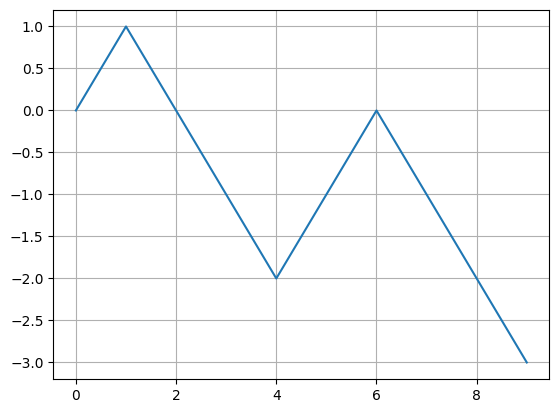

Position Variance:  1.29
Theoretical Variance:  1.0


In [15]:
# Sequence of coin flips
coin_flips = [
    "H", "T", "T", "T", "H", "H", "T", "T", "T"
]

# Create an empty list for the random walk and the initial position
position = 0
position_log = [position]

# Loop over the coin flips
for idx, flip in enumerate(coin_flips):

    # If the flip is a head, add 1 to X_{t-1}
    if flip == "H":
        position += 1

    # If the flip is a tail, subtract 1 from X_{t-1}
    elif flip == "T":
        position -= 1

    # Append the new value to the random walk
    position_log.append(position)

# Print the random walk
print(position_log)
print(list(range(len(position_log))))

# Plot the random walk
plt.plot(position_log)
plt.grid()
plt.show()

# Variance of the position
print("Position Variance: ", np.var(position_log))
print("Theoretical Variance: ", np.var([1, -1]))


#### Biased Coin Toss and Random Walk


In [24]:
p_h = 0.75
p_t = 0.25

# Walk values for heads and tails
step_h = 1
step_t = -1

# Get the mean of the random walk
mean_rw = p_h*step_h + p_t*step_t
print("Mean of the random walk: ", mean_rw)

# Calculate the variance of a biased random walk
var_rw = p_h*step_h**2 + p_t*step_t**2 - mean_rw**2
print("Variance of the random walk: ", var_rw)


Mean of the random walk:  0.5
Variance of the random walk:  0.75


#### Statistics of Random Walk


In [27]:
# =============== S = 5 / T = 10 =============== #

# Steps s and t
s = 5
t = 10

# Variance of white noise
var_wn = 1

# Get the minimum between s and t
min_st = min(s, t)

# Calculate the autocovariance for (s, t)
autocov_st = min_st * var_wn
print(f"Autocovariance for ({ s }, { t }): ", autocov_st)

# =============== S = 10 / T = 15 ============== #

# Steps s and t
s = 10
t = 15

# Minimum between s and t
min_st = min(s, t)

# Calculate the autocovariance for (s, t)
autocov_st = min_st * var_wn
print(f"Autocovariance for ({ s }, { t }): ", autocov_st)


Autocovariance for (5, 10):  5
Autocovariance for (10, 15):  10


### 6. Moving Average Model

#### ACF of Moving Average Model

$$
\displaystyle  \gamma _ X(h) \displaystyle = \textsf{Cov}\Big(\sum _{j=0}^ q \theta _ j W_{t-j}, \sum _{k=0}^ q \theta _ k W_{t+h-k}\Big)
\displaystyle = \sum _{j=0}^{q-h} \theta _ j \theta _{j+h} \sigma ^2_ W \quad \text {for}\quad 0\le h \le q
$$

For this exercise I simply translated the final sum of this equation into a Python loop. It worked. One thing to remember though, is that the autocovariance will be zero for all `h` values greater than `q`. This is because after this point, the covariance term stops sharing common terms, causing all values to return 0.


In [39]:
# Variance of white noise
var_wn = 1

# List of all the coefficients for the white noise terms
theta = [1, 0.5, 1/3]

# Gap value (how much time we will average to get the "moving average")
gap = h = 3

# Order (How many white noise terms we will average)
order = q = 2

sum = 0
for j in range(q - h + 1):
    sum += theta[j] * theta[j + h] * var_wn

print(f"Autocovariance Function (ACF) for h = {h}: {sum}")


Autocovariance Function (ACF) for h = 3: 0
